# Palmer Penguins dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# El dataset

Carregam el dataset a un dataframe a partir del fitxer csv: "penguins_lter.csv".

In [3]:
df = pd.read_csv("penguins_lter.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
df.shape

(344, 17)

In [5]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

A l'anàlisi anterior hem pogut veure que hi ha diverses columnes amb un valor únic per a cada mostra: "Individual ID" i "Sample number". Aquestes columnes no aporten cap informació que caracteritzi a la mostra per això es poden eliminar.

La columna "Comments" tampoc aporta cap informació rellevant ja que només té 26 valors no nuls. Tot i que es podria utilitzar per extreure noves característiques amb el contingut del text, per aquest exercici d'exemple també l'eliminarem.

A continuació eliminam les columnes "Comments", "Individual ID" i "Sample number".

In [7]:
df.drop("Comments", axis=1, inplace=True)

df.drop("Individual ID", axis=1, inplace=True)
df.drop("Sample Number", axis=1, inplace=True)

## Anàlisi i neteja de dades

En aquesta secció analitzarem el contingut de les dades del dataset carregat a la secció anterior.
El dataset disposa de 14 columnes (17 menys les 3 que hem eliminat), de les quals volem analitzar el seu contingut.

### Valors absents

Amb la següent comanda consultam totes les files del dataframe amb valors absents:

In [8]:
df[df.isna().any(axis=1)]

,studyName,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/9/07,34.1,18.1,193.0,3475.0,NaN,NaN,NaN
9,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/9/07,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368
10,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/9/07,37.8,17.1,186.0,3300.0,NaN,8.63243,-25.21315
11,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/9/07,37.8,17.3,180.0,3700.0,NaN,NaN,NaN
12,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/15/07,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN
13,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/15/07,38.6,21.2,191.0,3800.0,MALE,NaN,NaN
15,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN
39,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",No,11/13/07,39.8,19.1,184.0,4650.0,MALE,NaN,NaN


In [9]:
df[df.isna().any(axis=1)].shape[0]

19

La solució més facil per a afrontar el problema dels valors absents és eliminar totes les files amb algun valor absent, i així ho feim a continuació:

In [10]:
df.dropna(inplace=True)

### Visualització de les dades

En aquesta secció visualitzarem com es distribueixen els valors de les dades a l'espai i com es separen en funció de les distintes classes.

Amb aquest fi, a continuació dibuixam el valor que prenen les diverses característiques numèriques del dataset en forma d'histogrames:

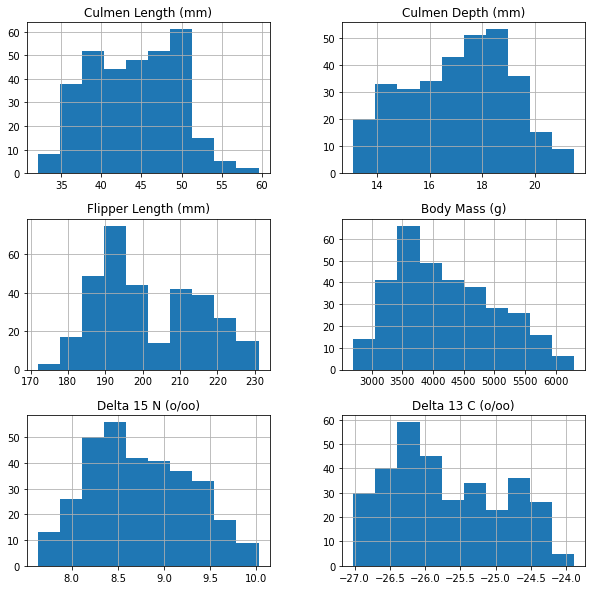

In [11]:
df.hist(figsize=(10, 10));

També podem realitzar histogrames de les variables categòriques:

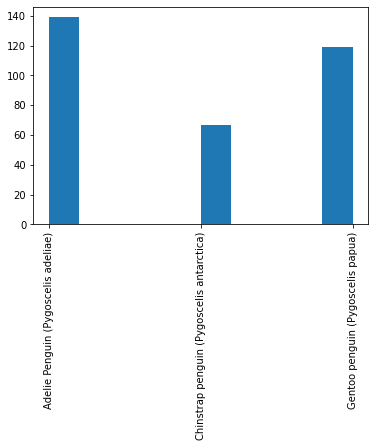

In [12]:
plt.hist(df['Species']);
plt.xticks(rotation='vertical');

Finalment, un altre tipus de gràfics molt interessants son els "scatter plots". Aquests gràfics ens serveixen per a dibuixar la relació entre dues variables, dibuixant una variable a l'eix $x$ i l'altre a l'eix $y$.

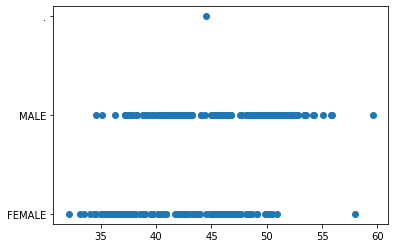

In [13]:
plt.scatter(df["Culmen Length (mm)"], df["Sex"]);

Al següent gràfic dibuixam les dues variables que fan referència a la mida del Culmen dels pingüins marcant cada mostra en funció del sexe del pingüí. Aquest gràfic és molt útil per a saber com de bé separen aquestes dues variables els exemples del dataset en funció del sexe.

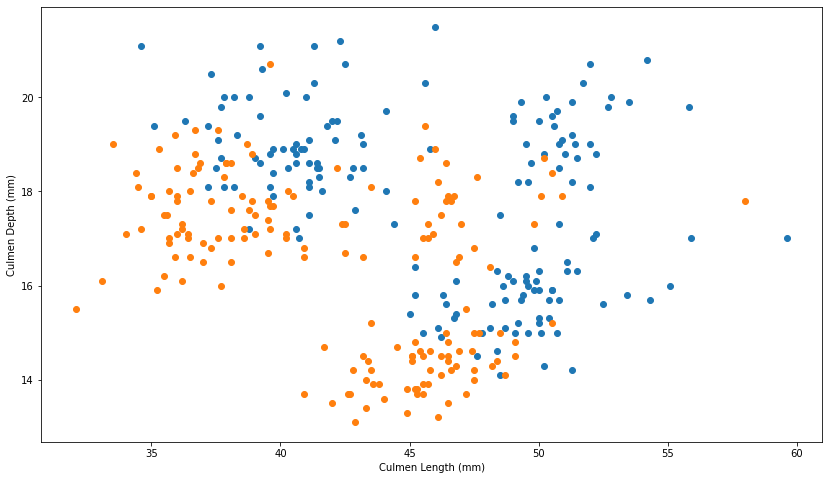

In [14]:
plt.figure(figsize=(14,8))

plt.scatter(df.loc[df["Sex"] == "MALE", "Culmen Length (mm)"], df.loc[df["Sex"] == "MALE", "Culmen Depth (mm)"]);
plt.scatter(df.loc[df["Sex"] == "FEMALE", "Culmen Length (mm)"], df.loc[df["Sex"] == "FEMALE", "Culmen Depth (mm)"]);

plt.xlabel("Culmen Length (mm)");
plt.ylabel("Culmen Depth (mm)");

Al següent exemple dibuixam el mateix gràfic, però en aquest cas en lloc de marcar els exemples en funció del sexe els marcam segons la raça del pingüí. Podem veure com segons la raça les tres classes estan quasi perfectament separades just amb la mida del Culmen.

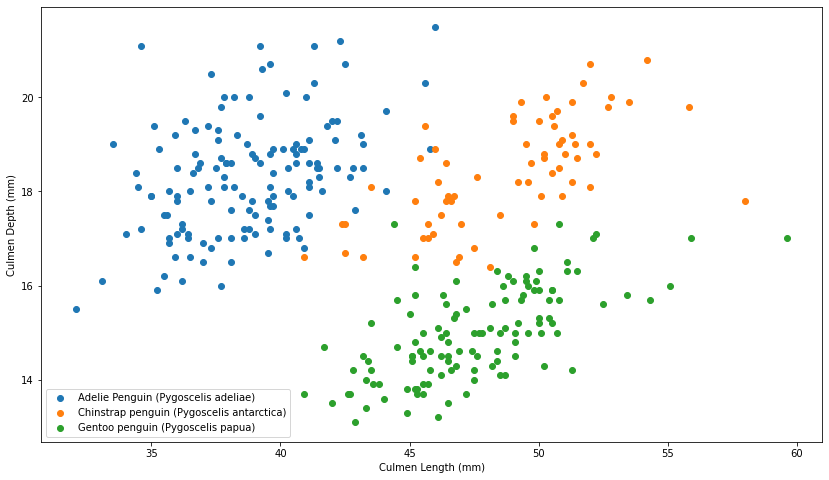

In [15]:
plt.figure(figsize=(14,8))

adelie_name = "Adelie Penguin (Pygoscelis adeliae)"
plt.scatter(df.loc[df["Species"] == adelie_name, "Culmen Length (mm)"], 
            df.loc[df["Species"] == adelie_name, "Culmen Depth (mm)"],
            label=adelie_name);

chinstrap_name = "Chinstrap penguin (Pygoscelis antarctica)"
plt.scatter(df.loc[df["Species"] == chinstrap_name, "Culmen Length (mm)"], 
            df.loc[df["Species"] == chinstrap_name, "Culmen Depth (mm)"],
            label=chinstrap_name);

gentoo_name = "Gentoo penguin (Pygoscelis papua)"
plt.scatter(df.loc[df["Species"] == gentoo_name, "Culmen Length (mm)"], 
            df.loc[df["Species"] == gentoo_name, "Culmen Depth (mm)"],
            label=gentoo_name);

plt.legend()
plt.xlabel("Culmen Length (mm)");
plt.ylabel("Culmen Depth (mm)");

Com que la separació de les dades en funció de la raça del pingüí és un problema molt fàcil intentarem crear un classificador que identifiqui el sexe dels pingüins.

### Codificació etiquetes

Amb el següent codi convertim tots els valors categòrics del dataset en valors numèrics.

In [16]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
df['studyName'] = labelencoder.fit_transform(df['studyName'])
df['Species'] = labelencoder.fit_transform(df['Species'])
df['Region'] = labelencoder.fit_transform(df['Region'])
df['Island'] = labelencoder.fit_transform(df['Island'])
df['Stage'] = labelencoder.fit_transform(df['Stage'])
df['Clutch Completion'] = labelencoder.fit_transform(df['Clutch Completion'])
df['Date Egg'] = labelencoder.fit_transform(df['Date Egg'])
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 343
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            325 non-null    int32  
 1   Species              325 non-null    int32  
 2   Region               325 non-null    int32  
 3   Island               325 non-null    int32  
 4   Stage                325 non-null    int32  
 5   Clutch Completion    325 non-null    int32  
 6   Date Egg             325 non-null    int32  
 7   Culmen Length (mm)   325 non-null    float64
 8   Culmen Depth (mm)    325 non-null    float64
 9   Flipper Length (mm)  325 non-null    float64
 10  Body Mass (g)        325 non-null    float64
 11  Sex                  325 non-null    int32  
 12  Delta 15 N (o/oo)    325 non-null    float64
 13  Delta 13 C (o/oo)    325 non-null    float64
dtypes: float64(6), int32(8)
memory usage: 27.9 KB


In [18]:
df.head()

,studyName,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,0,0,2,0,1,3,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454
2,0,0,0,2,0,1,15,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302
4,0,0,0,2,0,1,15,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426
5,0,0,0,2,0,1,15,39.3,20.6,190.0,3650.0,2,8.66496,-25.29805
6,0,0,0,2,0,0,12,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799


### Correlacions

A continuació mostram com dibuixar la matriu de correlacions de les columnes d'un dataframe facilment. Per a aconseguir gràfics més elegants s'aconsella utilitzar la llibrería [seaborn](https://seaborn.pydata.org/).

[Text(0, 0, 'studyName'),
 Text(0, 1, 'Species'),
 Text(0, 2, 'Region'),
 Text(0, 3, 'Island'),
 Text(0, 4, 'Stage'),
 Text(0, 5, 'Clutch Completion'),
 Text(0, 6, 'Date Egg'),
 Text(0, 7, 'Culmen Length (mm)'),
 Text(0, 8, 'Culmen Depth (mm)'),
 Text(0, 9, 'Flipper Length (mm)'),
 Text(0, 10, 'Body Mass (g)'),
 Text(0, 11, 'Sex'),
 Text(0, 12, 'Delta 15 N (o/oo)'),
 Text(0, 13, 'Delta 13 C (o/oo)')]

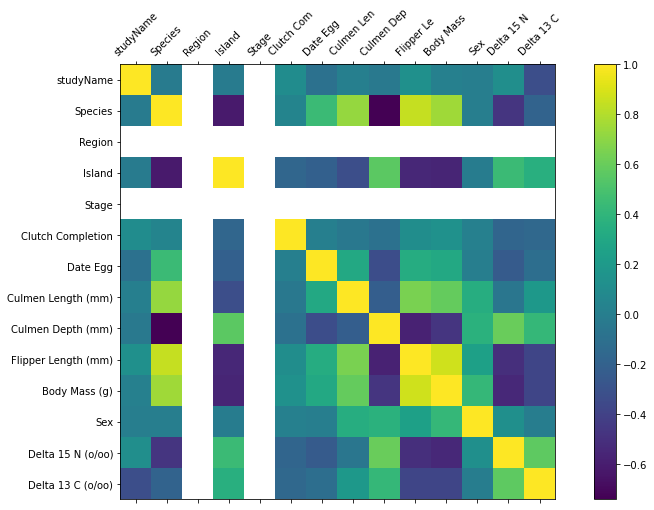

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr())
fig.colorbar(cax)

ax.xaxis.set_ticks(np.arange(len(df.columns)))
ax.yaxis.set_ticks(np.arange(len(df.columns)))
ax.set_xticklabels([item[:10] for item in df.columns], rotation=45)
ax.set_yticklabels(df.columns)

La informació trivial que podem extreure de la matriu de correlacions anterior és que les columnes "Region" i "Stage" no aporten cap informació al dataset. Segurament es poden eliminar, per a verificar-ho anem a veure quins valors contenen:

In [20]:
np.unique(df['Region'])

array([0])

In [21]:
np.unique(df['Stage'])

array([0])

Com que tots els elements de les dues columnes prenen el valor 0 les podrem eliminar.

## Preparació de les dades

### Eliminació features irrellevants

In [22]:
df.drop("Region", axis=1, inplace=True)
df.drop("Stage", axis=1, inplace=True)

### Separació features i etiquetes

In [23]:
y = df["Sex"]
df.drop("Sex", axis=1, inplace=True)
X = df.values 

### Escalat de les dades

In [24]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Separació conjunt d'entrenament i de test

Una vegada tenim les dades preprocessades, hem de dividir les dades en un conjunt d'entrenament i un de validació. Cada un amb la seva finalitat:
* Conjunt d'entrenament: Conjunt de dades utilitzat per a ajustar els paràmetres del model. (Entrenament)
* Conjunt de validació: Conjunt de dades utilitzat per a optimitzar/ajustar els hyper-paràmetres del model.

Sovint, també es divideix en un conjunt extra:
* Conjunt de test: Conjunt per a verificar que els resultats són generalitzables a dades noves.


[Explicació wikipedia](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [26]:
X_train.shape

(217, 11)

In [27]:
X_test.shape

(108, 11)

## Construcció del classificador

In [28]:
from sklearn.linear_model import LogisticRegression


In [29]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [30]:
y_hat = clf.predict(X_test)

## Avaluació del classificador

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat, target_names=["MALE", "FEMALE"]))

              precision    recall  f1-score   support

        MALE       0.94      0.92      0.93        51
      FEMALE       0.93      0.95      0.94        57

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.93       108
weighted avg       0.94      0.94      0.94       108



### RDF

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat, target_names=["MALE", "FEMALE"]))

              precision    recall  f1-score   support

        MALE       0.92      0.96      0.94        51
      FEMALE       0.96      0.93      0.95        57

    accuracy                           0.94       108
   macro avg       0.94      0.95      0.94       108
weighted avg       0.95      0.94      0.94       108



### Perceptró

In [33]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat, target_names=["MALE", "FEMALE"]))

              precision    recall  f1-score   support

        MALE       0.83      0.96      0.89        51
      FEMALE       0.96      0.82      0.89        57

    accuracy                           0.89       108
   macro avg       0.89      0.89      0.89       108
weighted avg       0.90      0.89      0.89       108

